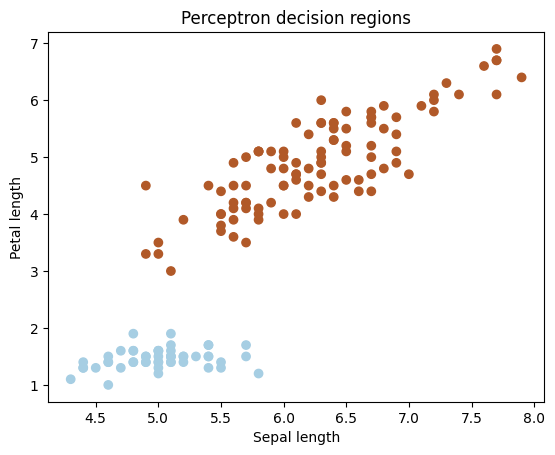

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# load iris dataset
iris = load_iris()

# print(iris)
# extract sepal length and petal length features
X = iris.data[:, [0, 2]]
y = iris.target

# setosa is class 0, versicolor and verginica is class 1  
y = np.where(y == 0, 0, 1) 

# initialize weights and bias
w = np.zeros(2)
b = 0

# set learning rate and number of epochs
lr = 0.1
epochs = 50

# define perceptron function
def perceptron(x, w, b):
    # calculate weighted sum of inputs
    z = np.dot(x, w) + b
    # apply step function
    return np.where(z >= 0, 1, 0)

# train the perceptron
for epoch in range(epochs):
    for i in range(len(X)):
        x = X[i]
        target = y[i]
        output = perceptron(x, w, b)
        error = target - output
        w += lr * error * x  #w=w+lr*error*x     #readjusting the weight after calculating the error functions
        b += lr * error     #b=b+lr*error        #readjusting the bias after calculating the error functions

# plot decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5  #decision boundary from min value-0.5 to max value+0.5 for features of iris data
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5  #decision boundary from min value-0.5 to max value+0.5 for target value of iris data
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),     #The np.meshgrid() function takes 1-D array as an input and returns two 2-dimensional arrays, X and Y, that represent the coordinate grid.
                     np.arange(y_min, y_max, 0.02))
Z = perceptron(np.c_[xx.ravel(), yy.ravel()], w, b)  #np.c_[] converts 1-d array to 2-d array, xx.ravel() and yy.ravel() converts 2d array to 1d array hence to perceptron a 2d array is passed
Z = Z.reshape(xx.shape) #reshaping the output according to output of xx
# plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

# plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Perceptron decision regions')
plt.show()

#here blue color points are iris setosa and red color points are versicolor and verginica